# Coding a simple (random) Multi-Armed Bandit Agent

In this section, we shall code a simple MAB agent. The idea here is to create the example of slot machines explained in the previous [page](mab.md) to understand the working of a simple MAB agent.

We shall have some slot machines each with a distribution of reward. User shall pick a slot machine independently at a time to receive a reward. Each selection is independent to its previous selection as the current setting does not make any decision using previous data.

**Feel free to explore the slot machines by using the live code option on the top of this page.**

**Bandits with Gaussian Reward distribution**

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Class for a single slot machine. Rewards are Gaussian.
class GaussianBandit(object):
    def __init__(self, mean=0, stdev=1):
        self.mean = mean
        self.stdev = stdev
    
    def pull_lever(self):
        reward = np.random.normal(self.mean, self.stdev)
        return np.round(reward, 1)
    
# Class to initialize all Gaussian bandits and play the game.
class GaussianBanditGame(object):
    def __init__(self, bandits):
        self.bandits = bandits
#         np.random.shuffle(self.bandits)
        self.reset_game()
    
    def play(self, choice):
        reward = self.bandits[choice - 1].pull_lever()
        self.rewards.append(reward)
        self.total_reward += reward
        self.n_played += 1
        return reward
    
    def user_play(self):
        self.reset_game()
        print("Game started. " + 
              "Enter 0 as input to end the game.")
        while True:
            print(f"\n -- Round {self.n_played}")
            choice = int(input(f"Choose a machine " + 
                     f"from 1 to {len(self.bandits)}: "))
            if choice in range(1, len(self.bandits) + 1):
                reward = self.play(choice)
                print(f"Machine {choice} gave " + 
                      f"a reward of {reward}.")
                avg_rew = self.total_reward/self.n_played
                print(f"Your average reward " +
                      f"so far is {avg_rew}.")
            else:
                break
        print("Game has ended.")
        if self.n_played > 0:
            print(f"Total reward is {self.total_reward}" + 
                  f" after {self.n_played} round(s).")
            avg_rew = self.total_reward/self.n_played
            print(f"Average reward is {avg_rew}.")
            
    def user_play_random_pick(self):
        avg_reward = []
        self.reset_game()
        print("Game started.")
        
        for i in range(10000):
            choice = np.random.choice(3)+1
            reward = self.play(choice)
            avg_rew = self.total_reward/self.n_played
            avg_reward.append(avg_rew)

        print("Game has ended.")
        if self.n_played > 0:
            print(f"Total reward is {self.total_reward}" + 
                  f" after {self.n_played} round(s).")
            avg_rew = self.total_reward/self.n_played
            print(f"Average reward is {avg_rew}.")
            
        plt.plot(avg_reward)
        plt.title("Average Rewards")
        plt.show()
    
    def user_play_exploit_pick(self):
        avg_reward = []
        self.reset_game()
        print("Game started.")
        
        for i in range(10000):
            choice = 2
            reward = self.play(choice)
            avg_rew = self.total_reward/self.n_played
            avg_reward.append(avg_rew)

        print("Game has ended.")
        if self.n_played > 0:
            print(f"Total reward is {self.total_reward}" + 
                  f" after {self.n_played} round(s).")
            avg_rew = self.total_reward/self.n_played
            print(f"Average reward is {avg_rew}.")
            
        plt.plot(avg_reward)
        plt.title("Average Rewards")
        plt.show()
            
    def reset_game(self):
        self.rewards = []
        self.total_reward = 0
        self.n_played = 0
        
slotA = GaussianBandit(5, 3)
slotB = GaussianBandit(6, 2) # Best slot machine with highest reward
slotC = GaussianBandit(1, 5)
game = GaussianBanditGame([slotA, slotB, slotC])

#game.user_play()

Game started.
Game has ended.
Total reward is 40088.19999999984 after 10000 round(s).
Average reward is 4.008819999999984.


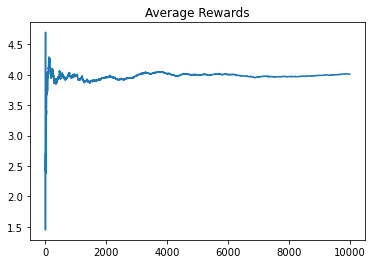

In [41]:
# Automating the slot picking using random decision and visualizing the reward
game.user_play_random_pick()

Game started.
Game has ended.
Total reward is 60186.400000000016 after 10000 round(s).
Average reward is 6.018640000000001.


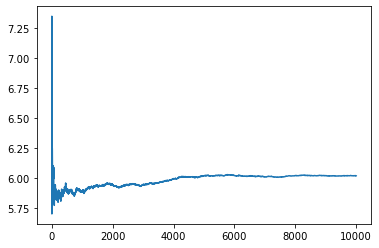

In [39]:
# Reward if the agent always picks the best slot machine
game.user_play_exploit_pick()

From the above results, we see that with increased number of trails, the average reward per individual slot machine converges the true mean. This is perfectly in lines with [Law of Large numbers](https://www.investopedia.com/terms/l/lawoflargenumbers.asp#:~:text=What%20Is%20the%20Law%20of,as%20the%20sample%20become%20larger). This can be seen when the agent always picks the best slot machine. The estimated mean converges to 6.018.

**Slot machines with a fixed probability of binary reward.**

Estimated probabilities 0.8974358974358971
Estimated probabilities 0.7978660343805561
Estimated probabilities 0.5002985074626864
Total reward earned =  7308.0
Overall win rate =  0.7308
Number of optimal pulls =  3276


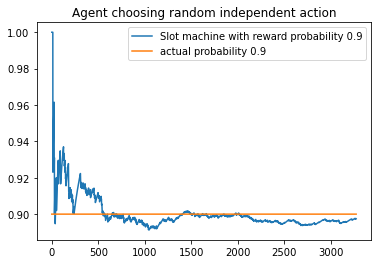

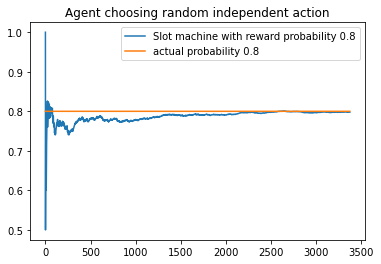

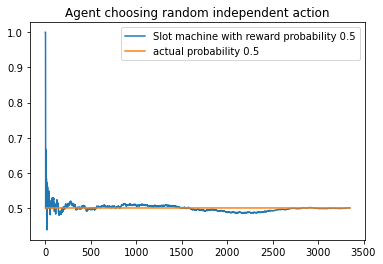

In [65]:
## Multi-Arm Bandit code
import numpy as np
import matplotlib.pyplot as plt
Bandit_probs= [0.9,0.8,0.5]
num_trails = 10000

class Bandit:
    def __init__(self, prob):
        self.actual_prob = prob
        self.prob_estimate = 0
        self.N = 0
    def pull(self):
        return np.random.random()<self.actual_prob
    def update(self,x):
        self.N+=1
        self.prob_estimate+=(1/self.N)*(x-self.prob_estimate)
        return self.prob_estimate
    
def experiment():
    bandits = [Bandit(p) for p in Bandit_probs]
    rewards = np.zeros(num_trails)
    slot_rew = [[], [], []]
    num_steps = 0
    num_optimal = 0
    optimal_j = np.argmax([b.actual_prob for b in bandits])
    
    for i in range(num_trails):
        j = np.random.choice(len(bandits))
        num_steps +=1
        
        if j == optimal_j:
            num_optimal+=1
            
        rewards[i] = bandits[j].pull()
        curr_estimate = bandits[j].update(rewards[i])
        slot_rew[j].append(curr_estimate)
        
        
    for b in bandits:
        print("Estimated probabilities", b.prob_estimate)
        
    print("Total reward earned = ", rewards.sum())
    print("Overall win rate = ", rewards.sum()/num_trails)
    print("Number of optimal pulls = ", num_optimal)

    for i in range(len(slot_rew)):
        plt.plot(slot_rew[i], label = "Slot machine with reward probability {}".format(Bandit_probs[i]))
        plt.plot(np.ones(len(slot_rew[i]))*(Bandit_probs[i]), label = 'actual probability {}'.format(Bandit_probs[i]))
        plt.legend()
        plt.title("Agent choosing random independent action")
        plt.show()
    
if __name__ == "__main__":
    experiment()

In the above example code, the agent receives a reward of 1 or 0 based on the probability of reward of individual bandits. It is clearly seen that even with an agent with completely random actions, the estimated probabilities for reward and the true probabilities for reward converge at around 1500 time steps.

**Consider pondering if 1500 time steps are sufficient or considerable to stop exploring. Is there a better way where we do not lose upon the reward by choosing suboptimal bandits? We shall explore those solutions in the next page.**

To understand the code better try making changes to the reward function, the update function and try creating some plots too. Trust me you cant break the existing code.